In [71]:
import random
import torch
from d2l import torch as d2l

In [72]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000) # 生成正态分布的X
print(features)




tensor([[-0.2343, -0.1707],
        [ 0.4452, -1.2218],
        [-0.0934, -1.4210],
        ...,
        [ 1.4062,  0.3580],
        [ 0.1563,  0.8389],
        [ 0.6961,  1.0275]])


In [73]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2343, -0.1707]) 
label: tensor([4.3052])


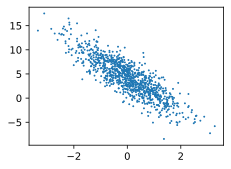

In [74]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [75]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取 没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        # yield原来是这么用！
        yield features[batch_indices], labels[batch_indices]


In [76]:
batch_size = 19

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
print(labels)


tensor([[-5.9737e-02,  1.0459e+00],
        [-2.6349e-01,  1.4868e+00],
        [ 3.4570e-01, -1.0004e+00],
        [-2.1953e+00, -1.0062e+00],
        [-2.2682e-01,  1.4950e+00],
        [-1.5658e+00,  5.7329e-02],
        [-1.8724e-01,  2.1919e-01],
        [ 7.4492e-01, -7.2519e-01],
        [ 5.3503e-01,  5.4681e-04],
        [-1.9487e+00, -1.5492e-01],
        [-3.8668e-01, -4.1750e-02],
        [-9.1791e-01,  9.7583e-01],
        [ 1.3989e+00, -1.4198e+00],
        [-4.6338e-01,  1.4152e+00],
        [-6.4866e-01,  1.0027e-01],
        [ 7.8275e-01, -1.1435e-01],
        [ 2.4643e-01, -3.9299e-01],
        [ 1.6280e-01,  5.6425e-01],
        [-1.3887e+00,  7.3885e-01]]) 
 tensor([[ 0.5175],
        [-1.3960],
        [ 8.3040],
        [ 3.2319],
        [-1.3378],
        [ 0.8798],
        [ 3.0696],
        [ 8.1665],
        [ 5.2591],
        [ 0.8300],
        [ 3.5771],
        [-0.9354],
        [11.8320],
        [-1.5282],
        [ 2.5618],
        [ 6.1539],
        [

In [77]:
# 初始化模型参数
#参数loc(float)：正态分布的均值，对应着这个分布的中心。loc=0说明这一个以Y轴为对称轴的正态分布
#参数scale(float)：正态分布的标准差，对应分布的宽度，scale越大，正态分布的曲线越矮胖，scale越小，曲线越高瘦
#参数size(int 或者整数元组)：输出的值赋在shape里，默认为None


# w = torch.normal(0,0.01,size = (2,1) ,requires_grad=True)
w = torch.zeros(size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [78]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b


# loss function
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [79]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.687665
epoch 2, loss 0.029132
epoch 3, loss 0.001278


In [80]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0132, -0.0339], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0345], grad_fn=<RsubBackward1>)
